<a href="https://colab.research.google.com/github/utami-dotcom/polusi-cahaya/blob/main/Copy_of_Fotometri_Diferensial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
#from sklearn.linear_model import LinearRegression
%matplotlib inline

# Install seaborn
!pip install seaborn

# Import seaborn
import seaborn as sns

# Set the seaborn style
sns.set_style("white") # Use "white" which is similar to "seaborn-white"
# If you want to use other seaborn styles, replace "white" with the desired style name.
# For example: sns.set_style("darkgrid")

plt.style.use('default') # Revert to the default matplotlib style to avoid conflicts

In [ ]:
data1 = pd.read_excel('/content/erori_fix.xlsx')
data1

,Label,slice,Saturated,J.D.-2400000,JD_UTC,JD_SOBS,HJD_UTC,BJD_TDB,AIRMASS,ALT_OBJ,...,FWHM_C3,Width_C3,X-Width_C3,Y-Width_C3,Angle_C3,Roundness_C3,N_Src_Pixels_C2,N_Sky_Pixels_C2,N_Src_Pixels_C3,N_Sky_Pixels_C3
0,erori_25s_calibrated_001.fits,1,0,57341348697916608,24573413486979168,24573413485532408,24573413522199964,24573413530304096,-1,-1644793699077053,...,2604358798225284,5535521574959174,5648985429743007,542205772017534,35040878532303436,9981176075521284,3141592653589793,5497787143782144,31415926535897928,5497787143782135
1,erori_25s_calibrated_002.fits,2,0,57341349033564792,2457341349033565,2457341348888889,2457341352555618,2457341353366031,-1,-16568175983005004,...,2353245401459437,5759923317303814,5686979601583717,5832867033023912,2946025272558386,9984976670536820,31415926535897944,549778714378214,3141592653589793,5497787143782133
2,erori_25s_calibrated_003.fits,3,0,573413493460645,24573413493460644,24573413492013888,24573413528680928,2457341353678506,-1,-16680121511807784,...,25374470988348388,49549040328586936,4699867459447082,5209940606270305,8264764189365987,9887326537675876,3141592653589795,5497787143782134,31415926535897944,5497787143782132
3,erori_25s_calibrated_004.fits,4,0,5734134968171269,24573413496817128,2457341349537037,24573413532037144,2457341354014127,-1,-16800358349745864,...,2446037352953116,5365981887078798,53876338900417,5344329884115896,3185010755483576,9956178311103244,31415926535897928,5497787143782139,31415926535897916,5497787143782131
4,erori_25s_calibrated_005.fits,5,0,57341350005786864,2457341350005787,2457341349861111,24573413535277624,2457341354338175,-1,-16916448040021804,...,2321080625459945,5580093899878706,547886273082697,5681325068930443,730926183435862,9980941719338934,3141592653589795,5497787143782143,31415926535897956,5497787143782142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,erori_25s_calibrated_198.fits,198,0,5734141287615709,2457341412876157,24573414127314812,2457341416393107,245734141720352,-1,-3940263636939329,...,277791400347422,18057557398102976,7834157090461892,2828095770574406,3022976256649923,-2994839897549372,3141592653589793,5497787143782143,31415926535897944,5497787143782137
198,erori_25s_calibrated_199.fits,199,0,5734141320023127,24573414132002312,24573414130555552,2457341416717155,24573414175275684,-1,-3951825495629981,...,25682473908241824,7629718737279912,8532847553280659,67265899212791656,4369814191880071,9442042908769864,31415926535897928,5497787143782149,31415926535897916,5497787143782139
199,erori_25s_calibrated_200.fits,200,0,5734141352430545,24573414135243056,24573414133796296,24573414170412036,24573414178516168,-1,-3963386901352811,...,2672476806783546,6419786821895497,5820065532179508,70195081116114856,7213581781417429,9479431017073440,3141592653589792,5497787143782134,3141592653589793,549778714378215
200,erori_25s_calibrated_201.fits,201,0,5734141384837963,24573414138483796,2457341413703704,24573414173652516,24573414181756648,-1,-39749478507088384,...,26617848428951712,6511181600497785,6471994799364958,6550368401630614,3156608469915475,7276991393381639,3141592653589793,5497787143782139,3141592653589794,5497787143782131


In [ ]:
m = -2.5*np.log10(data1['Source-Sky_T1']/data1['EXPTIME'])
m

,0
0,-36.270317
1,-36.249162
2,-36.258231
3,-36.266686
4,-36.269478
...,...
197,-35.794905
198,-35.874494
199,-35.730982
200,-38.428449


In [ ]:
#Δ Magnitudo Target (V446_Her_75) dengan bintang bintang pembanding 1 (HD_230269)
Δ_T1_C2 = -2.5*np.log10((data1['Source-Sky_T1']/data1['EXPTIME'])/(data1['Source-Sky_C2']/data1['EXPTIME']))
Δ_T1_C2

,0
0,-0.132567
1,-0.116064
2,-0.127441
3,-0.127877
4,-0.140639
...,...
197,1.977139
198,-2.995563
199,-0.502595
200,-0.651430


In [ ]:
Δ_T1_C2.max()-Δ_T1_C2.min()

10.41064007232101

In [ ]:
#Δ Magnitudo pembanding 1 (HD_230269) dengan bintang pemanding 2 (TCY 1051-944-1)
Δ_C2_C3 = -2.5*np.log10((data1['Source-Sky_C2']/data1['EXPTIME'])/(data1['Source-Sky_C3']/data1['EXPTIME']))
Δ_C2_C3

,0
0,-1.404203
1,1.116520
2,1.023197
3,-3.910028
4,1.109764
...,...
197,-0.969825
198,3.993809
199,1.623065
200,-1.111281


In [ ]:

Δ_C2_C3.max()-Δ_C2_C3.min()

15.0325077864786

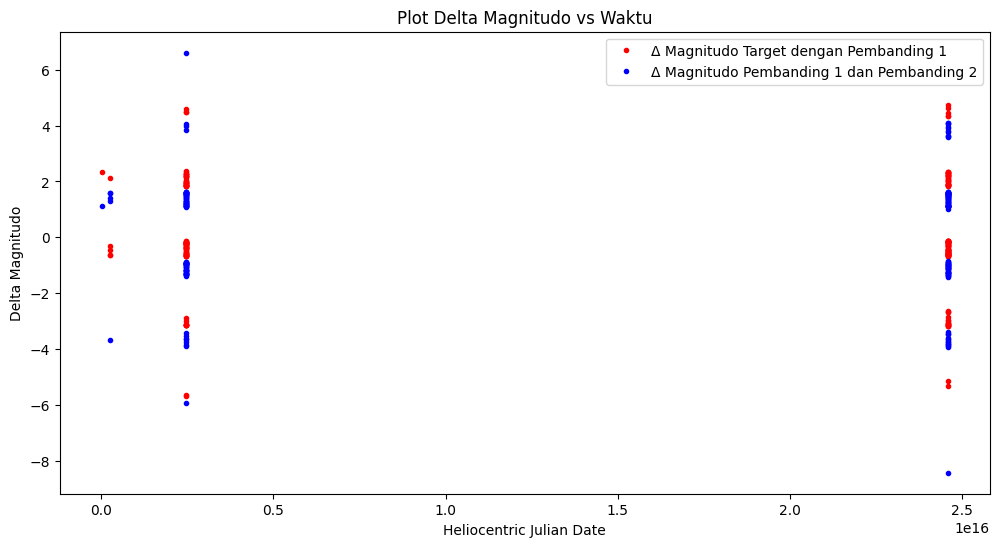

In [ ]:
plt.subplots(figsize=(12,6))
plt.plot(data1['HJD_UTC'],Δ_T1_C2,'r.',label='Δ Magnitudo Target dengan Pembanding 1')
plt.plot(data1['HJD_UTC'], Δ_C2_C3 ,'b.',label='Δ Magnitudo Pembanding 1 dan Pembanding 2')
plt.xlabel('Heliocentric Julian Date')
plt.ylabel('Delta Magnitudo')
plt.title('Plot Delta Magnitudo vs Waktu')
plt.legend()
plt.show()

In [ ]:
V446_Her_75 = -2.5*np.log10(data1['Source-Sky_T1']/data1['EXPTIME'])
V446_Her_75

,0
0,-36.270317
1,-36.249162
2,-36.258231
3,-36.266686
4,-36.269478
...,...
197,-35.794905
198,-35.874494
199,-35.730982
200,-38.428449


In [ ]:
HD_230269 = -2.5*np.log10(data1['Source-Sky_C2']/data1['EXPTIME'])
HD_230269

,0
0,-36.137750
1,-36.133098
2,-36.130790
3,-36.138809
4,-36.128839
...,...
197,-37.772044
198,-32.878931
199,-35.228387
200,-37.777019


In [ ]:
TCY_1051_944_1 = -2.5*np.log10(data1['Source-Sky_C3']/data1['EXPTIME'])
TCY_1051_944_1

,0
0,-34.733546
1,-37.249618
2,-37.153987
3,-32.228781
4,-37.238604
...,...
197,-36.802219
198,-36.872740
199,-36.851452
200,-36.665738


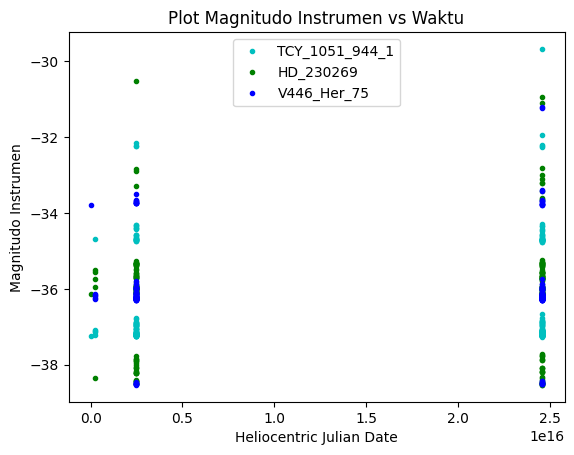

In [ ]:
plt.plot(figsize=(12,6))
plt.plot(data1['HJD_UTC'],TCY_1051_944_1,'c.',label ='TCY_1051_944_1')
plt.plot(data1['HJD_UTC'],HD_230269,'g.', label ='HD_230269')
plt.plot(data1['HJD_UTC'],V446_Her_75,'b.',label = 'V446_Her_75')
plt.xlabel('Heliocentric Julian Date')
plt.ylabel('Magnitudo Instrumen')
plt.title('Plot Magnitudo Instrumen vs Waktu')
plt.legend()
plt.show()